In [1]:
import pandas as pd
from kmeans import KMeans

In [2]:
# Read data into a pandas df.
data = pd.read_csv('./data/iris.csv')

# Define features to be extracted.
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
labels = data['species'].as_matrix()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [3]:
def create_flower_mapping(labels):
    '''
    Converts the flower labels into indices.
    '''
    flower_to_index = dict()

    for i, flower in enumerate(set(labels)):
        flower_to_index[flower] = i

    return flower_to_index


flower_to_index = create_flower_mapping(labels)

In [4]:
# Create a numpy matrix of features in the data.
X = data[features].as_matrix()

# Convert flowers into labels for comparison later.
labels = [flower_to_index[i] for i in labels]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [7]:
# Instantiate K-means
model = KMeans(number_of_clusters=3)
predictions = model.fit(X)

<IPython.core.display.Javascript object>


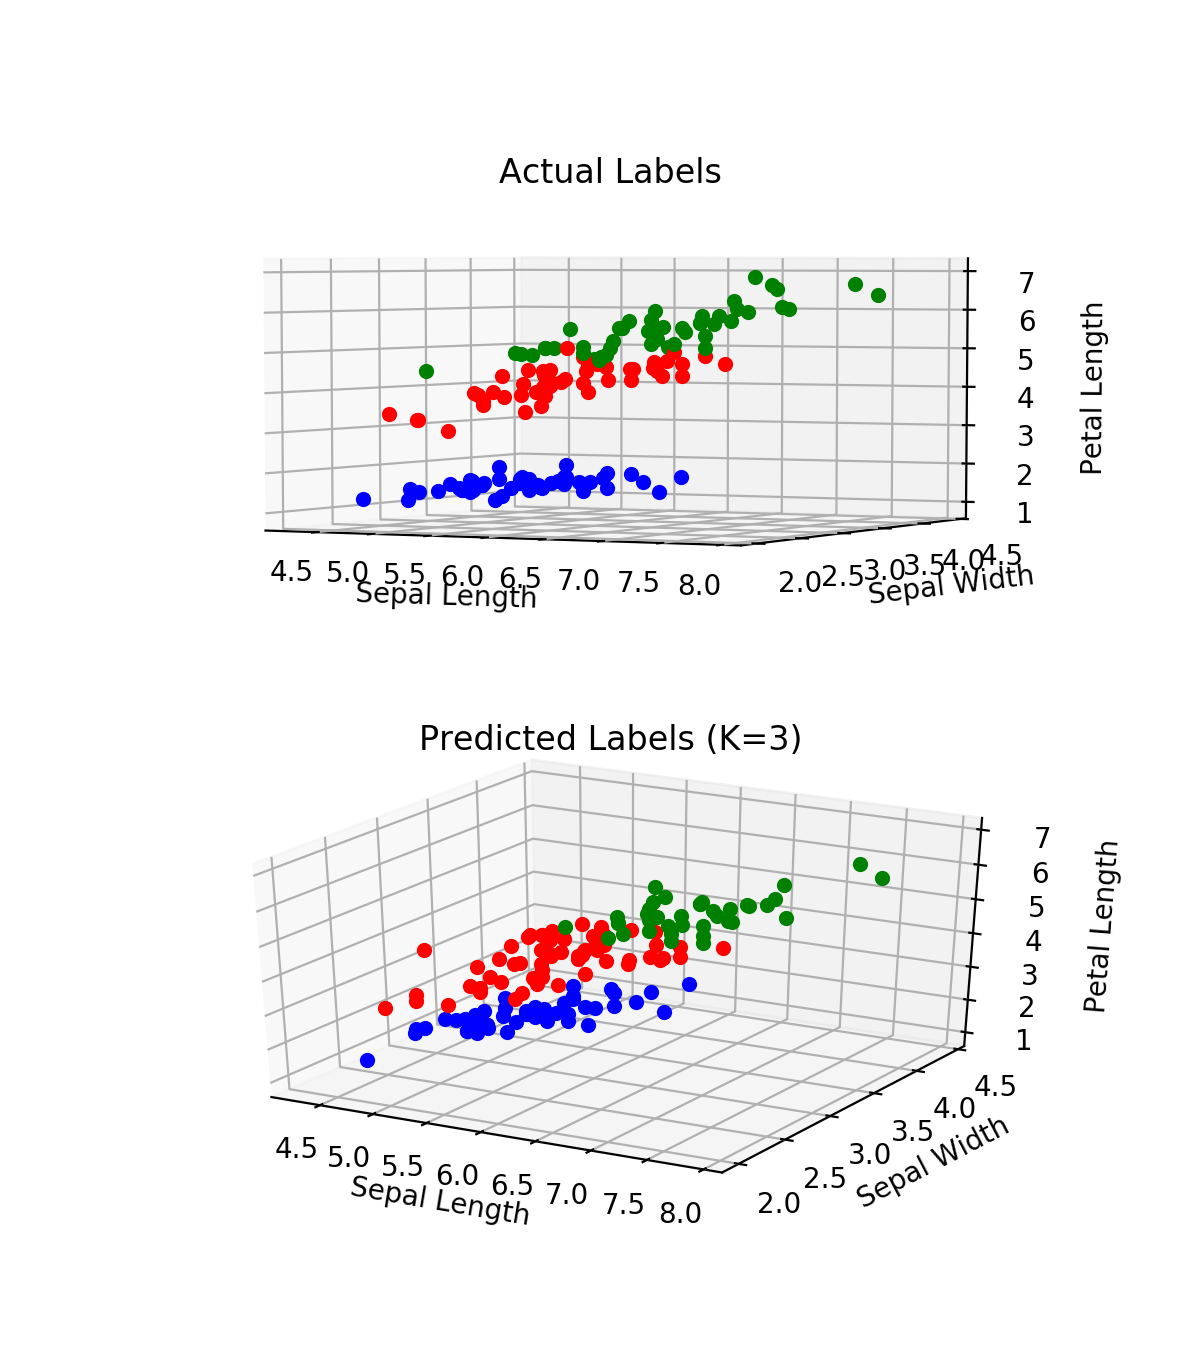

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

colors = ['b', 'r', 'g']
for i, data_point in enumerate(X):
    ax1.scatter(data_point[0], data_point[1],
                data_point[2], color=colors[labels[i]])
    ax2.scatter(data_point[0], data_point[1], data_point[
                2], color=colors[predictions[i]])

ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_zlabel('Petal Length')
ax1.set_title('Actual Labels')

ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_zlabel('Petal Length')
ax2.set_title('Predicted Labels (K=3)')
plt.show()